### Student Information
Name: 王俊皓

Student ID: 112062649

GitHub ID: 92728539

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

# Lab1: Homework

## 1 Load Data

In [1]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the data into a pandas dataframe (personal preference - hope that's ok)

In [2]:
data = pd.DataFrame(ds['train'])

In [3]:
data.values[:2]

array([['not nostalgia',
        'He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.'],
       ['nostalgia',
        'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel']],
      dtype=object)

Showing the label

In [4]:
data['sentiment'].unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

## 2 Preprocessing

First, we generate label in a numeric form:
```
'nostalgia'     -> 1
'not nostalgia' -> 0
```

In [5]:
data['label'] = data['sentiment'].apply(lambda t: int(t == 'nostalgia'))
data

sentiment                                            comment  label
0     not nostalgia  He was a singer with a golden voice that I lov...      0
1         nostalgia  The mist beautiful voice ever I listened to hi...      1
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...      1
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...      0
4         nostalgia  listening to his songs reminds me of my mum wh...      1
...             ...                                                ...    ...
1495  not nostalgia  i don't know!..but the opening of the video,.....      0
1496  not nostalgia  it's sad this is such a beautiful song when yo...      0
1497  not nostalgia  Dear Friend, I think age and time is not that ...      0
1498      nostalgia  I was born in 1954 and started to be aware of ...      1
1499      nostalgia  This is the first CD I bought after my marriag...      1

[1500 rows x 3 columns]

Checking for missing values

In [6]:
import helpers.data_mining_helpers as dmh

data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                label  
0  The amoung of missing records is:   
1                                   0

Checking for duplicated values

In [7]:
sum(data.duplicated())

1

Hmm, seems like we have a duplicated data. Let's see what it is before it's cruel execution.

In [8]:
data[data.duplicated(keep=False)]

sentiment                                            comment  label
62  not nostalgia  never heard this song before... WOW What an am...      0
78  not nostalgia  never heard this song before... WOW What an am...      0

Yeah seems like genuine dupe record (as opposed to some 2 people accidentally said the same thing). Farewell.

In [9]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)

In [10]:
data.shape

(1499, 4)

Sampling, since it's in the main lab so I will do it, probably not used for later.

In [11]:
data_sample = data.sample(n=200)

<Axes: title={'center': 'Category distribution'}, xlabel='label'>

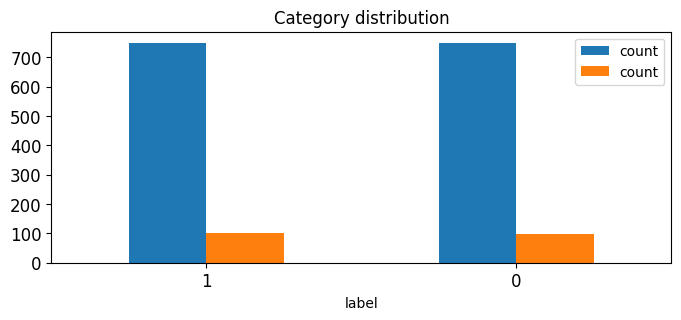

In [12]:
%matplotlib inline

pd.DataFrame([data.label.value_counts(), data_sample.label.value_counts()]).transpose().plot(kind = 'bar',
                                                                                            title = 'Category distribution',
                                                                                            rot = 0, fontsize = 12, figsize = (8,3))

## 3 Visualizing Data

Next, we use count vectorizer from sklearn for feature generation.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(data['comment'])

In [14]:
print(data_cv[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [15]:
cv.get_feature_names_out()[3570]

'was'

Next we show some more meaningful visualizations for the cv, this time a little different than the exercise I did in the master:

the top terms are extracted from the first document, and showing how those terms repeat in other documents.

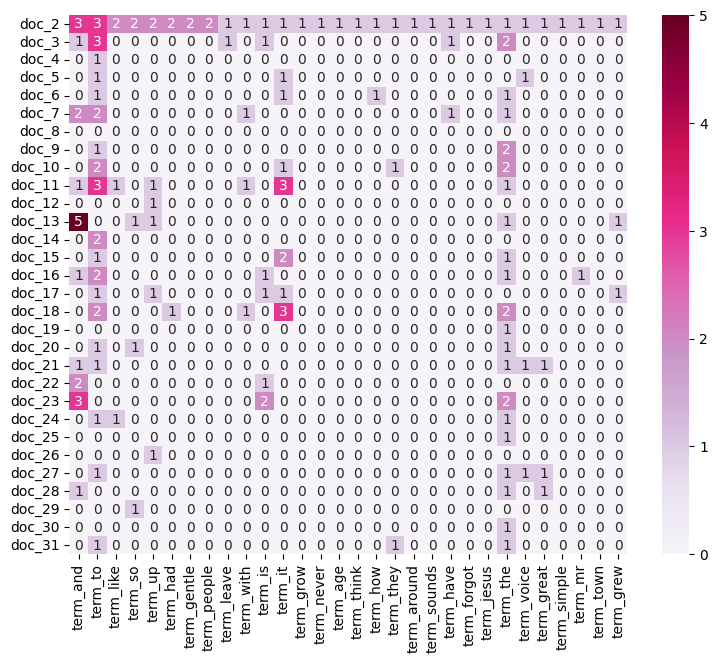

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

num_of_docs = 30
num_of_terms = 30

base_doc = 2 # the idx of the reference document, we choose the first one (data_cv[0])

plot_y = ["doc_"+ str(i + base_doc) for i in list(data.index)[0:num_of_docs]]

sorted_data_cv = pd.DataFrame(data_cv[base_doc].toarray().transpose())
sorted_data_cv.sort_values(by=sorted_data_cv.columns[0], ascending=False, inplace=True)

idxs = list(sorted_data_cv.index)[:num_of_terms]
terms = [cv.get_feature_names_out()[i] for i in idxs]

plot_x = ['term_' + term for term in terms]

plot_z = data_cv[base_doc:base_doc+num_of_docs, idxs].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

Next we generate term frequency array

In [24]:
# since this data is smaller, we don't have to work in compressed form, which takes a lot longer to execute.
term_frequency = pd.DataFrame(data_cv.toarray()).sum().tolist()

In [25]:
# import math

# def gen_tf(tdm):

#     tf = []
#     for j in range(tdm.shape[1]):
#         tf.append(sum(tdm[:, j]).toarray()[0, 0])

#     return tf

# term_frequency = gen_tf(data_cv)
# term_frequency_log = [math.log(i) for i in term_frequency]

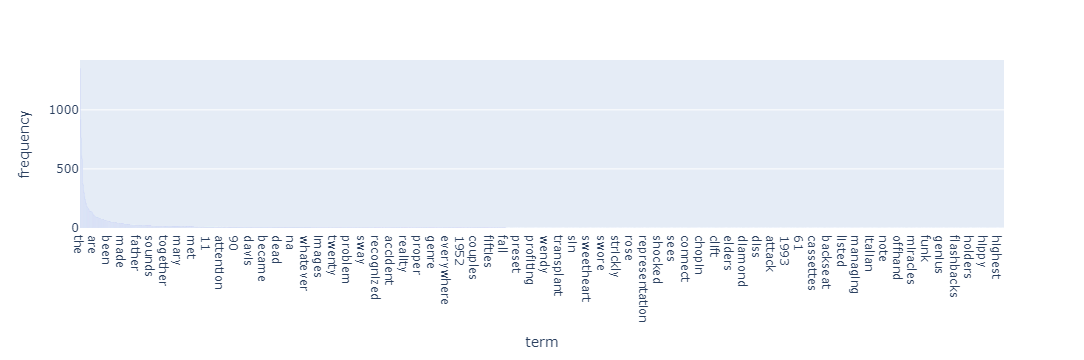

In [26]:
import plotly.express as px

def inspect_tf(terms, m):

    df = pd.DataFrame()
    df['term'] = terms
    df['frequency'] = m
    df.sort_values(by='frequency', inplace=True, ascending=False)

    fig = px.bar(df, x='term', y='frequency')

    fig.show()

inspect_tf(cv.get_feature_names_out(), term_frequency)

Convert data_cv into dataframe

In [27]:
data_cv_df = pd.DataFrame(data_cv.toarray())

cv_table = {}
for i, term in enumerate(cv.get_feature_names_out()):
    cv_table[i] = term
data_cv_df.rename(columns=cv_table, inplace=True)

In [28]:
nos_idxs = data[data['label'] == 0].index
notnos_idxs = data[data['label'] == 1].index
data_cv_df.loc[nos_idxs]

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
8      0    0    0   0   0    0    0   0     0   0  ...      0         0   
9      0    0    0   0   0    0    0   0     0   0  ...      0         0   
10     0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1492   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1493   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
8         0         0        0    0    0    0        0      0  
9         0         0        0    0    0    0        0      0  
10        0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1492      0         0        0    0    0    0        0      0  
1493      0         0        0    0    0    0        0      0  
1494      0         0        0    0    0    0        0      0  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  

[749 rows x 3730 columns]

Inspect how the distribution looks in each category

In [29]:
term_frequency_dfs = {}
term_frequency_dfs['nostalgia'] = data_cv_df.loc[nos_idxs]
term_frequency_dfs['not_nostalgia'] = data_cv_df.loc[notnos_idxs]

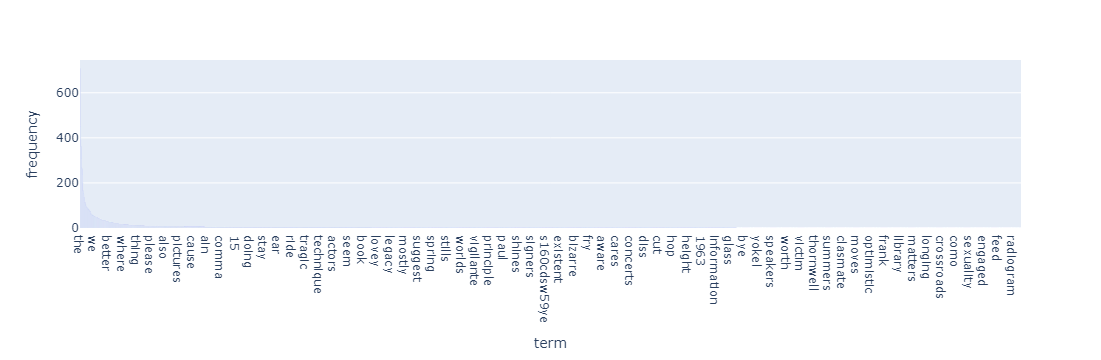

In [30]:
inspect_tf(cv.get_feature_names_out(), term_frequency_dfs['nostalgia'].sum().tolist())

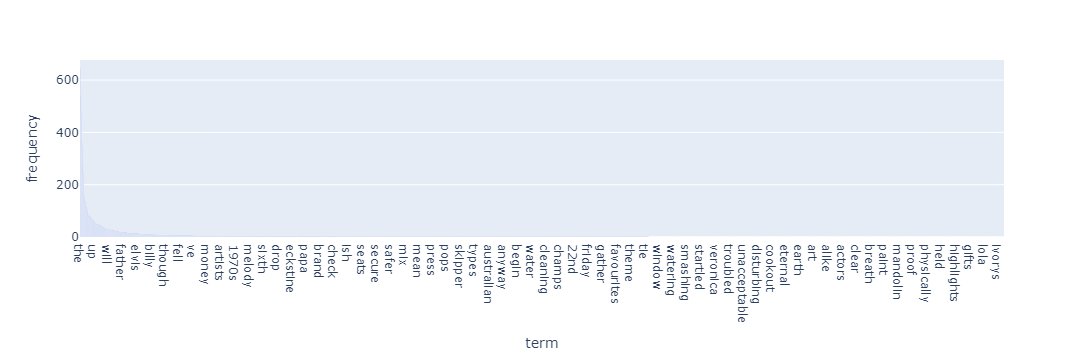

In [31]:
inspect_tf(cv.get_feature_names_out(), term_frequency_dfs['not_nostalgia'].sum().tolist())

Next, we convert the  term document matrix into a transactional dataset following lab1.

In [32]:
from PAMI.extras.DF2DB import DenseFormatDF as db



# Loop through the dictionary of term-document DataFrames
for l in term_frequency_dfs:
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_frequency_dfs[l])
    obj.convert2TransactionalDatabase(f'td_freq_db_{l}.csv', '>=', 1)

Database size (total no of transactions) : 749
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.048064085447262
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.368399001503127
Variance in Transaction Sizes : 107.64741937556671
Sparsity : 0.9922951329417958


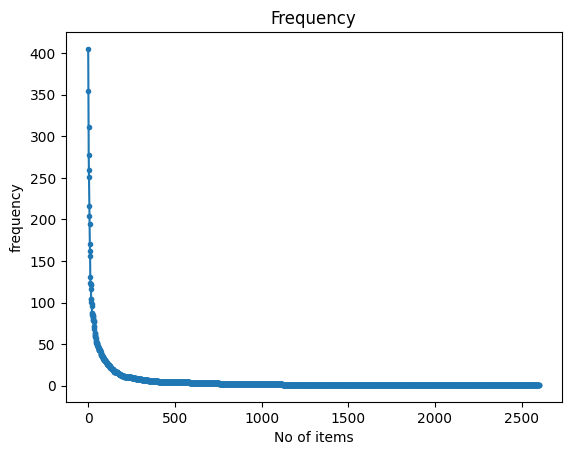

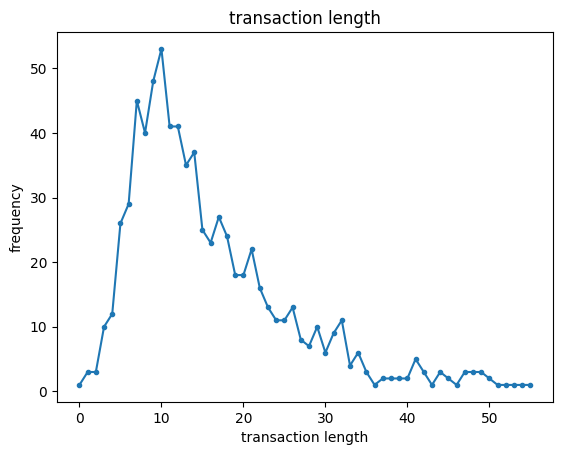

In [33]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [35]:
from PAMI.frequentPattern.basic import FPGrowth as alg

labels = ['nostalgia', 'not_nostalgia']
minSup=9

frequent_pattern_dfs = {}
for l in labels:
    obj1 = alg.FPGrowth(iFile=f'td_freq_db_{l}.csv', minSup=minSup)
    obj1.mine()
    frequent_pattern_dfs[l] = obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequent_pattern_dfs[l]))) #print the total number of patterns
    print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

    obj1.save(f'freq_patterns_soc_{l}_minSup{str(minSup)}.txt') #save the patterns

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 0.18133068084716797
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.9169673919677734


Huh, the number of patterns in not nostalgia comment is significantly larger.

In [41]:
frequent_pattern_dfs['not_nostalgia']

Patterns  Support
0             find        9
1             down        9
2              few        9
3              its        9
4             sure        9
...            ...      ...
71732  the my this      123
71733     the this      212
71734           my      400
71735      my this      252
71736         this      412

[71737 rows x 2 columns]

Next, we follow lab1 to discard common patterns in both labels, only keeping unique ones.

In [40]:
# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
dfs = [frequent_pattern_dfs[key] for key in frequent_pattern_dfs]
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

              Patterns  Support
72336         memories      227
74585            to my      227
74580          song my      212
74589         the this      212
74587           the my      192
...                ...      ...
28229    just me it to        9
28230  just me it this        9
28232   just me and my        9
28237    just me of my        9
0            favorites        9

[74590 rows x 2 columns]
Number of patterns discarded: 6844


... And of the 9697 patterns in nostalgia comments, 6844 is also in not nostalgia comments.

In [101]:
# make sure the cv is still there
cv = CountVectorizer()
data_tdm = cv.fit_transform(data['comment'])
terms = cv.get_feature_names_out()

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df = augmented_df.loc[:, ~augmented_df.columns.duplicated()]

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  just back song the  \
0      0    0    0   0   0    0    0   0     0   0  ...                   0   
1      0    0    0   0   0    0    0   0     0   0  ...                   0   
2      0    0    0   0   0    0    0   0     0   0  ...                   0   
3      0    0    0   0   0    0    0   0     0   0  ...                   0   
4      0    0    0   0   0    0    0   0     0   0  ...                   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...                 ...   
1494   0    0    0   0   0    0    0   0     0   0  ...                   0   
1495   0    0    0   0   0    0    0   0     0   0  ...                   0   
1496   0    0    0   0   0    0    0   0     0   0  ...                   0   
1497   0    0    0   0   0    0    0   0     0   0  ...                   0   
1498   0    0    0   0   0    0    0   0     0   0  ...                   0   

      just me so to  just back song the this  just back song was my  \
0                 0                        0                      0   
1                 0                        0                      0   
2                 0                        0                      0   
3                 0                        0                      0   
4                 0                        0                      0   
...             ...                      ...                    ...   
1494              0                        0                      0   
1495              0                        0                      0   
1496              0                        0                      0   
1497              0                        0                      0   
1498              0                        0                      0   

      this just back song was my  just back to was  just me it to  \
0                              0                 0              0   
1                              0                 0              0   
2                              0                 0              0   
3                              0                 0              0   
4                              0                 0              0   
...                          ...               ...            ...   
1494                           0                 0              0   
1495                           0                 0              0   
1496                           0                 0              0   
1497                           0                 0              0   
1498                           0                 0              0   

      just me it this  just me and my  just me of my  
0                   0               0              0  
1                   0               0              0  
2                   0               0              0  
3                   0               0              0  
4                   0               0              0  
...               ...             ...            ...  
1494                0               0              0  
1495                0               0              0  
1496                0               0              0  
1497                0               0              0  
1498                0               0              0  

[1499 rows x 78142 columns]

Dimensionality reduction

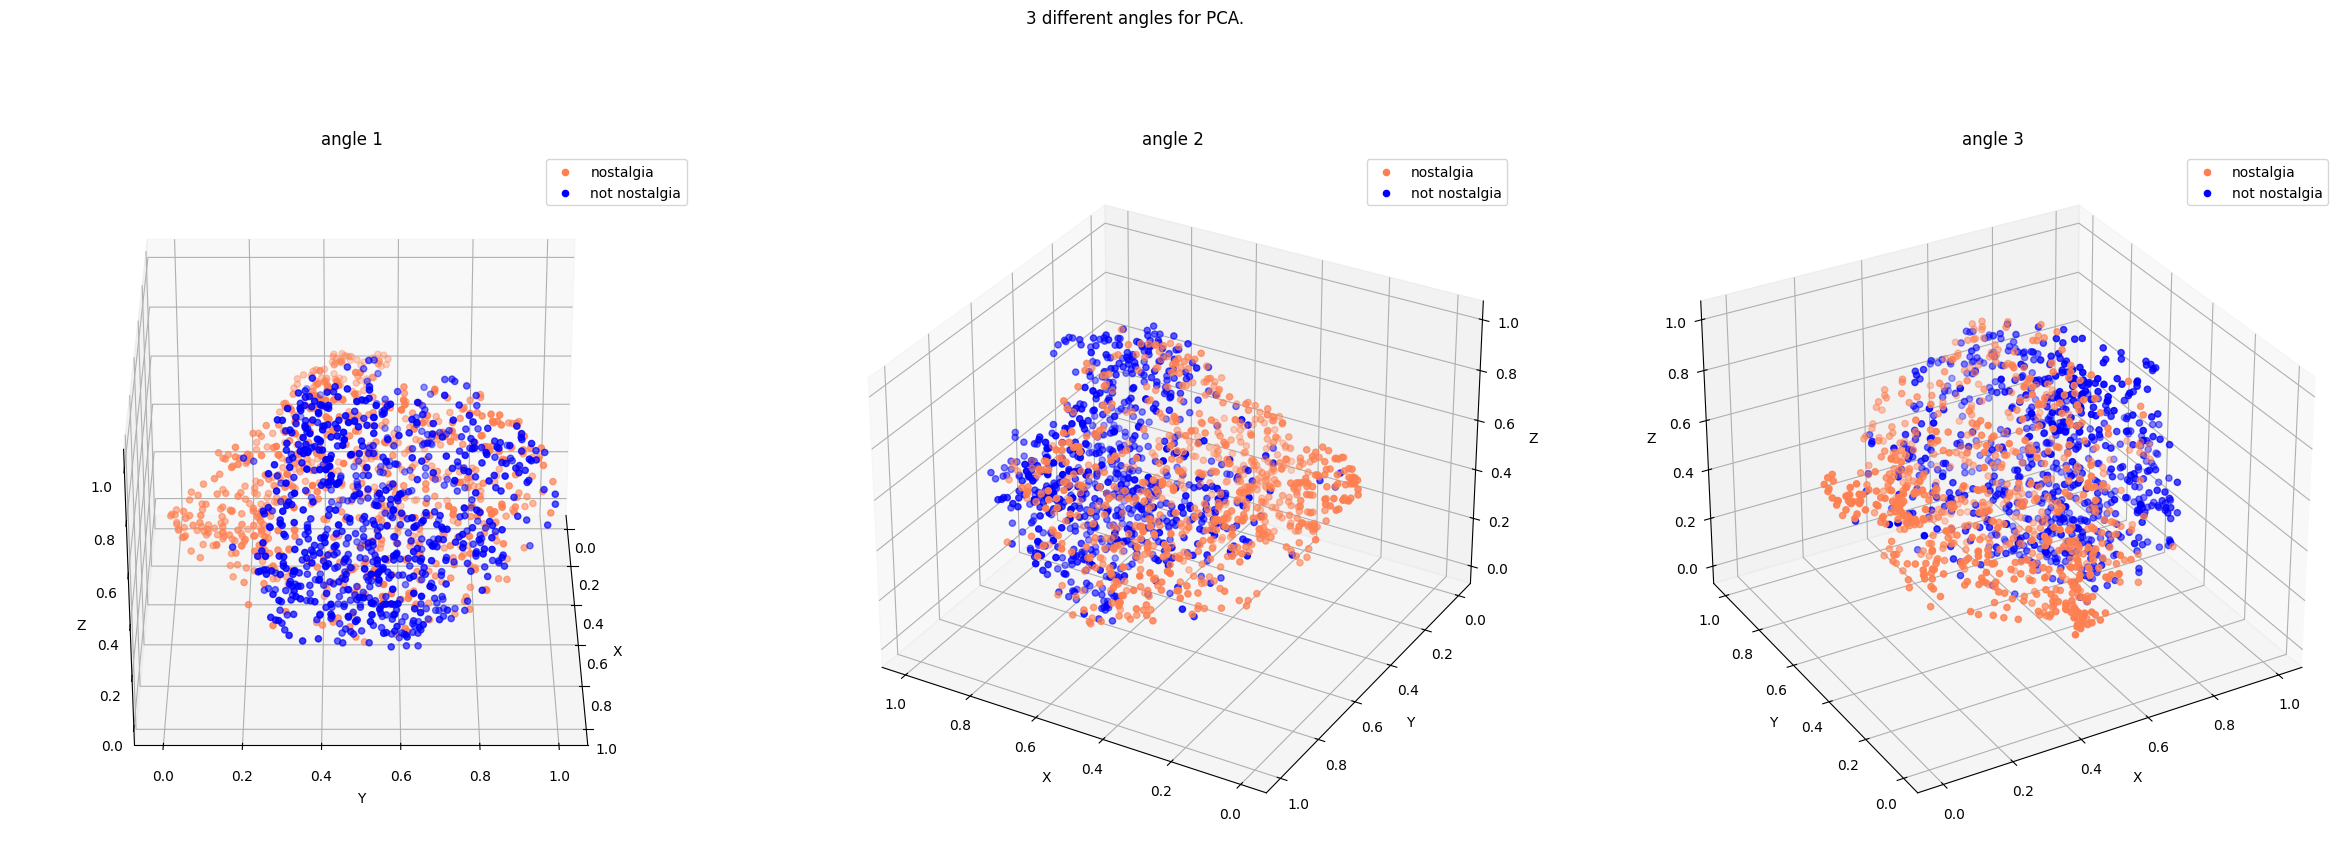

In [102]:
import umap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

data_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)
mms = MinMaxScaler()
data_aug = mms.fit_transform(data_aug)

# Plot the results in subplots
col = ['coral', 'blue']
categories = ['nostalgia', 'not nostalgia']

fig, axes = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('3 different angles for PCA.')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        zs = X_reduced[data['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
axes[0].view_init(elev=30, azim=0)
plot_scatter(axes[0], data_aug, 'angle 1')
axes[1].view_init(elev=30, azim=120)
plot_scatter(axes[1], data_aug, 'angle 2')
axes[2].view_init(elev=30, azim=240)
plot_scatter(axes[2], data_aug, 'angle 3')

plt.show()

since the data here has binary labels, surely we don't need to do label binarization right?

...right?

Ok, I'm jumping to classification

## 4 Classification

We shall build a simple NB classifier and classify if the comment sentiment is nostalgia or not.

Recall the final features we've extracted

In [103]:
augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  just back song the  \
0      0    0    0   0   0    0    0   0     0   0  ...                   0   
1      0    0    0   0   0    0    0   0     0   0  ...                   0   
2      0    0    0   0   0    0    0   0     0   0  ...                   0   
3      0    0    0   0   0    0    0   0     0   0  ...                   0   
4      0    0    0   0   0    0    0   0     0   0  ...                   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...                 ...   
1494   0    0    0   0   0    0    0   0     0   0  ...                   0   
1495   0    0    0   0   0    0    0   0     0   0  ...                   0   
1496   0    0    0   0   0    0    0   0     0   0  ...                   0   
1497   0    0    0   0   0    0    0   0     0   0  ...                   0   
1498   0    0    0   0   0    0    0   0     0   0  ...                   0   

      just me so to  just back song the this  just back song was my  \
0                 0                        0                      0   
1                 0                        0                      0   
2                 0                        0                      0   
3                 0                        0                      0   
4                 0                        0                      0   
...             ...                      ...                    ...   
1494              0                        0                      0   
1495              0                        0                      0   
1496              0                        0                      0   
1497              0                        0                      0   
1498              0                        0                      0   

      this just back song was my  just back to was  just me it to  \
0                              0                 0              0   
1                              0                 0              0   
2                              0                 0              0   
3                              0                 0              0   
4                              0                 0              0   
...                          ...               ...            ...   
1494                           0                 0              0   
1495                           0                 0              0   
1496                           0                 0              0   
1497                           0                 0              0   
1498                           0                 0              0   

      just me it this  just me and my  just me of my  
0                   0               0              0  
1                   0               0              0  
2                   0               0              0  
3                   0               0              0  
4                   0               0              0  
...               ...             ...            ...  
1494                0               0              0  
1495                0               0              0  
1496                0               0              0  
1497                0               0              0  
1498                0               0              0  

[1499 rows x 78142 columns]

In [104]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X = augmented_df
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
nbc = MultinomialNB()
nbc = nbc.fit(X_train, y_train)

y_pred = nbc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7966666666666666


## 5 MORE Visualizations (putting this here because this is the start of the third task)

Lab1 didn't really visualize the augmented matrices, so here are some of them.

We can show the top patterns in some documents.

In [106]:
augmented_df[final_pattern_df[:20]['Patterns'].tolist()][:20]

memories  to my  song my  the this  the my  of my  and to  this the  \
0          0      0        0         0       0      0       1         0   
1          0      0        0         0       0      0       1         0   
2          0      1        0         0       1      1       1         0   
3          0      1        1         1       1      1       1         1   
4          0      1        0         0       0      1       0         0   
5          0      0        0         0       0      0       0         0   
6          0      0        0         0       0      0       0         0   
7          0      0        0         0       0      0       1         0   
8          0      0        0         0       0      0       0         0   
9          0      0        0         0       0      0       0         0   
10         0      0        0         1       0      0       0         1   
11         0      1        1         1       1      1       1         1   
12         0      0        0         0       0      0       0         0   
13         0      0        0         1       1      1       0         1   
14         0      1        0         0       0      0       0         0   
15         0      1        0         0       1      0       0         0   
16         0      1        0         0       1      1       1         0   
17         0      0        0         0       0      0       0         0   
18         0      1        0         1       1      1       0         1   
19         0      0        0         0       0      0       0         0   

    song my this  and my  and song  in my  to my this  to and  of song  \
0              0       0         0      0           0       1        0   
1              0       0         0      0           0       1        0   
2              0       1         0      0           0       1        0   
3              1       1         1      1           1       1        1   
4              0       0         0      0           0       0        0   
5              0       0         0      0           0       0        1   
6              0       0         0      0           0       0        0   
7              0       0         0      0           0       1        0   
8              0       0         0      1           0       0        0   
9              0       0         0      0           0       0        0   
10             0       0         0      0           0       0        0   
11             1       1         1      1           1       1        1   
12             0       0         0      0           0       0        0   
13             0       1         0      1           0       0        0   
14             0       0         0      0           0       0        0   
15             0       0         0      1           0       0        0   
16             0       1         0      1           0       1        0   
17             0       0         0      0           0       0        0   
18             0       0         0      1           1       0        0   
19             0       0         0      0           0       0        0   

    and song this  in was  to the this  and to the  to the my  
0               0       1            0           1          0  
1               0       0            0           0          0  
2               0       0            0           1          1  
3               1       0            1           1          1  
4               0       0            0           0          0  
5               0       0            0           0          0  
6               0       1            0           0          0  
7               0       0            0           1          0  
8               0       0            0           0          0  
9               0       0            0           0          0  
10              0       0            1           0          0  
11              1       1            1           1          1  
12              0       1            0   

ploty shape 30
plotx shape 31
plotz shape (30, 31)


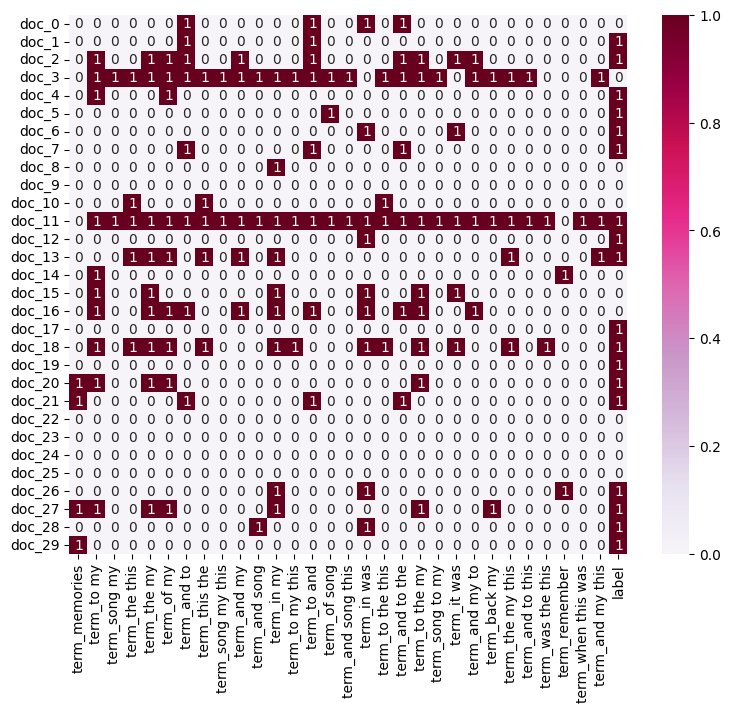

In [108]:
num_of_docs = 30
num_of_terms = 30

plot_y = ["doc_"+ str(i) for i in list(augmented_df.index)[0:num_of_docs]]
print(f'ploty shape {len(plot_y)}')

data_toshow = augmented_df[final_pattern_df[:num_of_terms]['Patterns'].tolist()][:num_of_docs]
data_toshow['label'] = data[:num_of_docs]['label']

idxs = list(sorted_data_cv.index)[:num_of_terms]

plot_x = ['term_' + term for term in final_pattern_df[:num_of_terms]['Patterns'].tolist()] + ['label']

print(f'plotx shape {len(plot_x)}')

plot_z = data_toshow.values

print(f'plotz shape {plot_z.shape}')

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

For the TF-IDF, we return to the count vectorizer.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
data_tdm = pd.DataFrame(cv.fit_transform(data['comment']).toarray())

tv = TfidfVectorizer()
data_tfidf = tv.fit_transform(data['comment'])

In [133]:
pd.DataFrame(data_tfidf.toarray())

0     1     2     3     4     5     6     7     8     9     ...  3720  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1494   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1495   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1496   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1497   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1498   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      3721  3722  3723  3724  3725  3726  3727  3728  3729  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1494   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1495   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1496   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1497   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1498   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1499 rows x 3730 columns]

Next, we construct Naive Bayes classifiers. We will try all 3 from the reference provided.

In [146]:
from sklearn.naive_bayes import GaussianNB

X = data_tfidf.toarray()
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
mnb = MultinomialNB()
mnb = mnb.fit(X_train, y_train)
bnb = BernoulliNB()
bnb = bnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred))
y_pred = mnb.predict(X_test)
print("MutinomialNB Accuracy:", accuracy_score(y_test, y_pred))
y_pred = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))

GaussianNB Accuracy: 0.63
MutinomialNB Accuracy: 0.8466666666666667
BernoulliNB Accuracy: 0.8733333333333333
